HSE, Applied Time Series Forecasitng , Spring 2022 

<font color="blue"> Lesson #10: DL in Timeseries Forecasting</font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

**Key words:** 
    - Deep Learning for Time Series Forecasting, TS Clustering

**Your feedback:**  please provide you feedback  <a href="https://forms.gle/bEV5iwmTqdM9rUoy8"> here </a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

from sklearn.cluster import AgglomerativeClustering

# don't forget to upload utils file to the colab session
# import warnings, pylab

warnings.filterwarnings('ignore')

# setting of the plotting style, registers pandas date converters for matplotlib and the default figure size
import seaborn as sns
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(25, 5))
sns.mpl.rc("font", size=14)

NameError: ignored

# DL in time series forecasting
**Questions**
* Does DL bring something new as time series forecasting approach?
* What are advantages of DL approach


## LSTM vs ARIMA

<img src = 'https://www.codeproject.com/KB/cross-platform/5165357/lstm-cell.png'>

ARMA model:
$$ y_t = \sum_{i=1}^\color{red}p \alpha_i\cdot y_{t-i}+\sum_{j=1}^\color{red}q \beta_j\cdot \varepsilon_{t-j}+\varepsilon_t$$
<img src = 'https://github.com/aromanenko/ATSF/blob/main/pic/Memory%20term%20in%20TSF.PNG?raw=true' width = 500pt>

**Question:**
* What are key difference between LSTM and ARIMA?
  - LSTM has non-linear components, 
  - LSTM has more sophisticated mixture of components

## Advantages of DL
**Questions**
* When non-linear transformation can be beneficial (can boost accuracy)?

<img src = 'https://github.com/aromanenko/ATSF/blob/main/pic/DL_Advantages.PNG?raw=true' width = 500pt>

TBD: add article with analysis of DL for Energy Forecasting

## Example of Usage
https://github.com/aromanenko/DLDF/blob/master/Partial_predictions.ipynb

# Time Series Segmentation

## Clustering based on Demand Behaviour to define Training approach
**Question:** How to split all timeseries with about the same structure?

*Idea: apply clustering algorithms to lagged features.



In [2]:
# Loading data
ts_retail = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/retail_2products.csv', sep=';')
ts_retail['Date'] = pd.to_datetime(ts_retail['Date'], dayfirst = True)
ts_retail.set_index(['Date'], inplace=True)
ts_retail.head()

,Store_id,SKU_id,Promo,Demand,Regular_Price,Promo_Price
Date,,,,,,
2015-01-01,1,1,NaN,22.0,163.78,NaN
2015-01-02,1,1,NaN,41.0,163.78,NaN
2015-01-03,1,1,NaN,35.0,163.78,NaN
2015-01-04,1,1,NaN,72.0,163.78,NaN
2015-01-05,1,1,NaN,25.0,163.78,NaN


In [3]:
ts_retail['SKU_id'].unique()

array([1, 2])

In [ ]:
for SKU in ts_retail['SKU_id'].unique():
  print(SKU)
  top_plu = list(top_sum[(top_sum['perc'] >= 0.01) & (top_sum['ui4_new'] == ui)]['MATNR'].unique())
  sales_top_plu = retail_ts()
  
  sales_top_plu_pivot = pd.pivot_table(sales_top_plu, 
                                        index='CFO', values='perc_per_day', columns='MATNR', fill_value=0)\
  .rename_axis(None, axis=1)

  agcl = AgglomerativeClustering(n_clusters=N_CLUSTERS)
  hypercluster_labels = agcl.fit_predict(sales_top_plu_pivot)
  hypercluster_labels = hypercluster_labels + 1
  hyperclustered_cfo = pd.DataFrame(hypercluster_labels, index=sales_top_plu_pivot.index, columns=['hypercluster_label'])
  hyperclustered_cfo = hyperclustered_cfo.reset_index()
  hyperclustered_cfo = pd.merge(hyperclustered_cfo, shops_data, on='CFO')
  print('\n\n\n')

## Building Time Series Forecastability Index
Those Time Series that have about the same accuracy level should have the same $\color{red}{Forecastability~Index}$.



<img src = 'https://github.com/aromanenko/ATSF/blob/main/pic/Forecastability%20Index.png?raw=true' width = 500pt>

Techniques to do it
* STL decomposition (detecting trend and seasonality) https://www.statsmodels.org/devel/examples/notebooks/generated/stl_decomposition.html

* ABC splitting (to segment by Demand Velocity and Demand Variability) https://pypi.org/project/abc-analysis/

or <a href = 'https://excel.city/2015/01/methods-of-classification-in-abc-analysis/'>more advanced tecniques </a>

* Intermittency time series tests 


In [2]:
!pip install abc_analysis

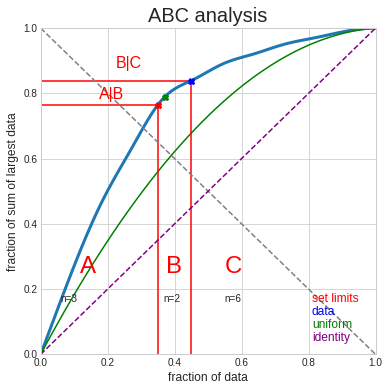

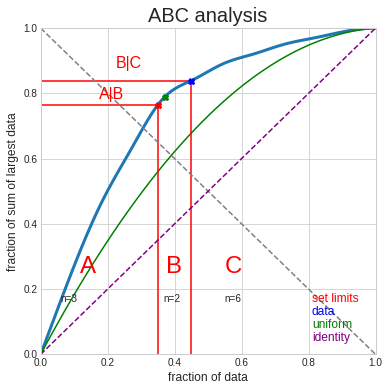

In [3]:
import abc_analysis
from abc_analysis import abc_analysis, abc_plot

# Perform an ABC analysis on a numeric vector (without plotting)
dctAnalysis = abc_analysis([1, 15, 25, 17, 2, 3, 5, 6, 2, 3, 22])

# Perform an ABC analysis with plotting
dctAnalysis = abc_analysis([1, 15, 25, 17, 2, 3, 5, 6, 2, 3, 22], True)

# Plot saved results of an ABC analysis
abc_plot(dctAnalysis)

# Conclusion

* DL can be useful in case of very sophisticated TS
* TS segmentation can be done by many different approaches
  - Building of ML models dimensions can be perfomed with Clustering algorithms
  - Building of Forecastability groups can be done with some conservative segmentation techniques  

## Materials
* List of TS forecasting packages in Python https://github.com/aromanenko/ATSF/wiki/List-of-packages-for-Time-Series-Forecasting-in-Python
* List of TS forecasitng packages in R https://github.com/aromanenko/ATSF/wiki/List-of-Packages-for-Time-Series-Forecatging-in-R
